In [14]:
import sys, os
import numpy as np

In [2]:
sys.path.append("/home/anton/BigMac/skoltech/CRISPR_research/notebooks/")

In [3]:
import utils.plot_utils as pu
import utils.hierarcical_utils as hu
import utils.hamiltonian_utils as hamu

In [96]:
from importlib import reload
hu = reload(hu)
hamu = reload(hamu)
pu = reload(pu)

In [164]:
# pairs_path = "../../data/ES/ES3_R1_pairs.txt"
# lines_path = "../../data/ES/ES3_R1_spacers.txt"

# pairs_path = "../../data/ES_reload/ES/ES2_R1_pairs.txt"
# lines_path = "../../data/ES_reload/ES/ES2_R1_spacers.txt"

# pairs_path = "../data/ES/ES5_R1_pairs.txt"
# lines_path = "../data/ES/ES5_R1_spacers.txt"

# pairs_path = "../../data/SlO_10/SlO1_R1_pairs_10.txt"
# lines_path = "../../data/SlO_10/SlO1_R1_spacers_10.txt"

pairs_path = "../../data/clostr_06_07/good_1-10_R1_06_07pairsq10.txt"
pairs2_path = "../../data/clostr_06_07/good_1-10_R2_06_07pairsq10.txt"

#pairs_path = "../data/Thermus/III/Vesuvius (1)_III_pairs.txt"
#lines_path = "../data/Thermus/III/Vesuvius (1).III.txt"

# with open(lines_path) as f:
#     lines = [x[:] for x in f.readlines()][1::] #CAREFULLLL

with open(pairs_path) as f:
    pairs = [[y[:] for y in x[:-2].split(' ') ] for x in f.readlines()]
with open(pairs2_path) as f:
    pairs2 = [[y[:] for y in x[:-2].split(' ') ] for x in f.readlines()]
    
lines = []
for p in pairs:
    lines.append(p[0])
    lines.append(p[1])
    
print(len(lines))

2516852


In [7]:
lines[:5]

['AAAGGTGACCATTGATTTCTTTCAGTTTCGGGAATA',
 'TGTTTTCCATAAACATTTCTAATTGACTTTTATTGT',
 'TGGTATATCATACTCGTGCATTGCCTGCTCCACATT',
 'ATACAACCATATATTTACCAATTATGTACTTATGAA',
 'CCAATTAAGTTACTAGATAAAAAAATAGAACAAATTA']

In [8]:
pairs[:2]

[['AAAGGTGACCATTGATTTCTTTCAGTTTCGGGAATA',
  'TGTTTTCCATAAACATTTCTAATTGACTTTTATTGT'],
 ['TGGTATATCATACTCGTGCATTGCCTGCTCCACATT',
  'ATACAACCATATATTTACCAATTATGTACTTATGAA']]

In [9]:
od = hu.get_ordered_spacers(lines)

In [10]:
answ, sp_to_n, cl_to_n, n_to_cl = hu.squash(od, 6)

A Jupyter Widget

In [19]:
counter = 0
true_keys = set()
for item in answ.items():
    if item[1] > 3:
        counter += 1
        true_keys.add(item[0])

In [20]:
cl_to_n = dict(zip(list(true_keys), np.arange(len(true_keys))))

In [21]:
len(cl_to_n)

227

In [22]:
pairs_cl = hu.process_pairs(pairs, cl_to_n, 6)

A Jupyter Widget

In [23]:
gr = hamu.pairs_to_gr(pairs_cl, len(cl_to_n))

In [24]:
np.save("./110", gr)

In [25]:
import pickle

In [26]:
pickle.dump(cl_to_n, open("./110_cl_to_n", 'wb'))
pickle.dump(answ, open("./110_nd", 'wb'))

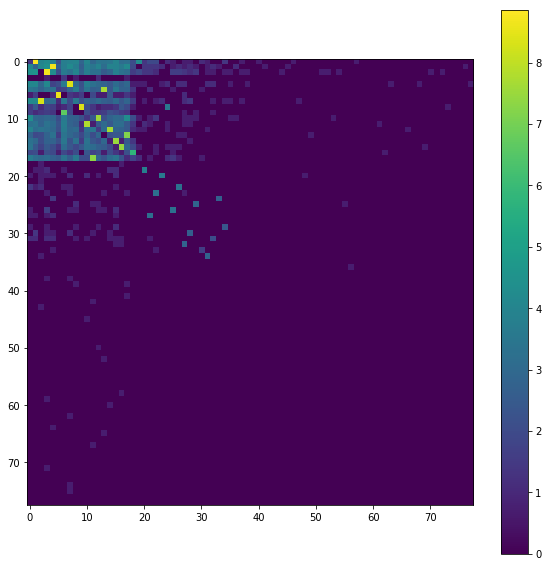

In [11]:
pu.plot_gr(gr, log =1)

In [276]:
arrays, weights = hamu.restore_arrays(gr)

In [190]:
mean_weights = [np.mean(x) for x in weights]

In [191]:
lens = [len(x) for x in arrays]

In [192]:
import matplotlib.pyplot as plt

<Container object of 18 artists>

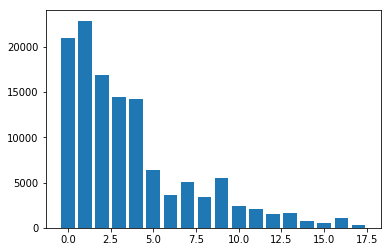

In [193]:
plt.bar(np.arange(18), mean_weights[:18])

In [64]:
mean_weights = [np.mean(x) for x in weights]

In [66]:
lens = [len(x) for x in arrays]

In [70]:
import matplotlib.pyplot as plt

<Container object of 18 artists>

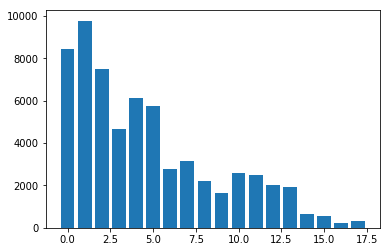

In [71]:
plt.bar(np.arange(18), mean_weights[:18])

In [196]:
with open("../../data/answers/Clo_013316.txt") as f:
    strain1 = [x[:-2].split(",") for x in f.readlines()]

In [260]:
with open("../../data/answers/Clo_009089.txt") as f:
    strain2 = [x[:-2].split(",") for x in f.readlines()]

# investigation

In [187]:
import editdistance as ed
from tqdm import tqdm_notebook

In [106]:
arrays[1]

[72, 186, 159, 12, 215, 201, 61, 205, 154, 57, 109, 43, 46, 220, 8]

In [198]:
mask = []
for i in range(25):
    if a_close_to_any_b(arrays[i], cl_1):
        mask.append(1)
    elif a_close_to_any_b(arrays[i], cl_2):
        mask.append(2)
    else:
        mask.append(0)


In [199]:
mask

[0, 1, 1, 1, 1, 0, 2, 0, 1, 1, 0, 2, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 1, 1]

In [123]:
ed.eval([72, 186, 159, 12, 215, 201, 61, 205, 154, 57, 109, 43, 46, 220, 8], [ 159, 12, 215, 201, 61, 205, 154, 57, 109, 43, 46, 220, 8])

2

In [125]:
def a_close_to_b(a, b, t = 2):
    return ed.eval(a, b) <= 2

def a_close_to_any_b(a, b, t = 2):
    return any([a_close_to_b(a, x, t) for x in b])
        

In [239]:
cl1 = [[cl_to_n[hu.find_closest(cl_to_n, x)[1]] for x in y] for y in strain1]

In [261]:
cl2 = [[cl_to_n[hu.find_closest(cl_to_n, x)[1]] for x in y] for y in strain2]

In [241]:
[[hu.find_closest(cl_to_n, x) for x in y] for y in strain2]

[[(2, 'CTAGAATTAGAACTCATTATTAAAACCATTCTTGCAAG'),
  (0, 'TAATCTGACACATACAAAGTTGAACCTAGTGGTACG'),
  (0, 'AAAAGCGTTCTTAAATCGTTACTTAACTCTTGCAAA'),
  (0, 'TGGTATATCATACTCGTGCATTGCCTGCTCCACATT'),
  (0, 'ATACAACCATATATTTACCAATTATGTACTTATGAA'),
  (0, 'TTTTTTAACTTTTCAGTTCTCACAGGCGTTTCATC'),
  (0, 'TTCATATTCCAAGCGTTTTGCTTACACTTAATAGAA'),
  (1, 'AAAATTAAATTTCATGCTCTTAGACATACATATGCAA'),
  (1, 'TAGATTGCTTTCAAATTACCTCTTGTATAGCGTCTT'),
  (1, 'TTGCTCCGCTATGCCTTGCGCTCTCTAATATCGCTTA'),
  (1, 'TGAACTTTAATCGGTTTTATACAACAATATAACGC'),
  (0, 'TCACACATGAGCAATATCGAAACAGGCAAATCTACA'),
  (0, 'TTCGTAAAATAACAATTATCTGGAATATGAGAAGTT'),
  (0, 'CACTCTTAAGTTGTGACCTATCTGATATATGATTAA'),
  (2, 'TCAATATCTATATTAAGTTTATTTTTAAAAACATCT')],
 [(1, 'GTAGAGTCTTTATATGGTAGAGGTGGAATATATAAGT'),
  (1, 'AACTCTTCAATATCTCCTAATCGTTCAATATAATTCT'),
  (1, 'ACTGTATGCCATCTAAATGCATCATACAAACTTATTT'),
  (0, 'TATACTTCCTAATGCAATCAAATAAGTACCTAAAAT'),
  (1, 'TTCGCAACTTATGATGGTGAAATGATTACATTAACAG'),
  (2, 'AATATAACAAAGTGGATGTTCTCTAAAAATAAAGAG')],
 [(1,

In [217]:
import networkx as nx
import matplotlib.pyplot as plt

In [245]:
def prepare_pos(arrs, start_x = 0, start_y = 0):
    pos = {}
    x, y = 0, 0
    for arr in arrs:
        print(arr)
        for el in arr:
            pos[el] = (x,y)
            x += 1
        y += 1
        x = 0
    return pos, x, y

In [277]:
def create_shift_pos(pos, x_shift = 0, y_shift = -0.2):
    s_pos = {}
    for item in pos.items():
        s_pos[item[0]] = (item[1][0] + x_shift, item[1][1] + y_shift)
    return s_pos

In [295]:
def add_pos(arr, pos ):
    vertexes = []
    for x in [x for y in arr for x in y]:
        if not x in shift_pos.keys():
            vertexes.append(x)

    for i, v in enumerate(vertexes):
        pos[v] = (i, -1)
    
    return pos

In [270]:
G1 = nx.DiGraph()
for arr in cl1:
    G1.add_path(arr)
    
G2 = nx.DiGraph()
for arr in cl2:
    G2.add_path(arr)
pos = prepare_pos(cl2 + cl1)[0]

[72, 186, 159, 12, 215, 201, 61, 205, 154, 57, 109, 43, 46, 220, 8]
[42, 175, 120, 20, 195, 1, 13, 36, 111, 179, 116, 23]
[188, 206, 62, 178, 169, 89, 197, 47]
[63, 157, 221, 7, 165, 194, 177, 133, 0, 45, 199, 190, 5]
[214, 170, 20, 225, 70, 191, 105, 32, 113, 183, 18, 79, 9, 189]
[218, 77, 99, 119, 135, 217]
[222, 102, 176]
[94, 144, 4, 51, 90, 173]
[16, 3, 93, 147, 174, 56, 112, 126, 211, 39, 115, 146, 37, 31, 96, 6, 98, 182, 138]
[210, 53, 21, 50, 91, 118, 200, 171, 41, 122, 65, 145, 152, 172]
[95, 216, 14, 67, 156, 85, 86, 71, 121, 30, 23]
[151, 164, 223, 203]
[15, 26, 142, 166, 219]
[161, 54, 150, 168]
[149, 25, 52, 87, 24, 104, 136, 207, 196, 167, 16, 10, 81, 73]
[143, 76, 226, 11, 198, 148, 202, 84, 68]
[16, 3, 93, 60, 97, 35, 75, 130, 209, 2, 134, 114, 162, 23, 17, 137, 44, 180, 66, 140, 123, 117, 124, 80, 110, 48]


In [298]:
Gansw = nx.DiGraph()
for arr in arrays:
    Gansw.add_path(arr)

shift_pos = create_shift_pos(pos)
shift_pos = add_pos(arrays, shift_pos)

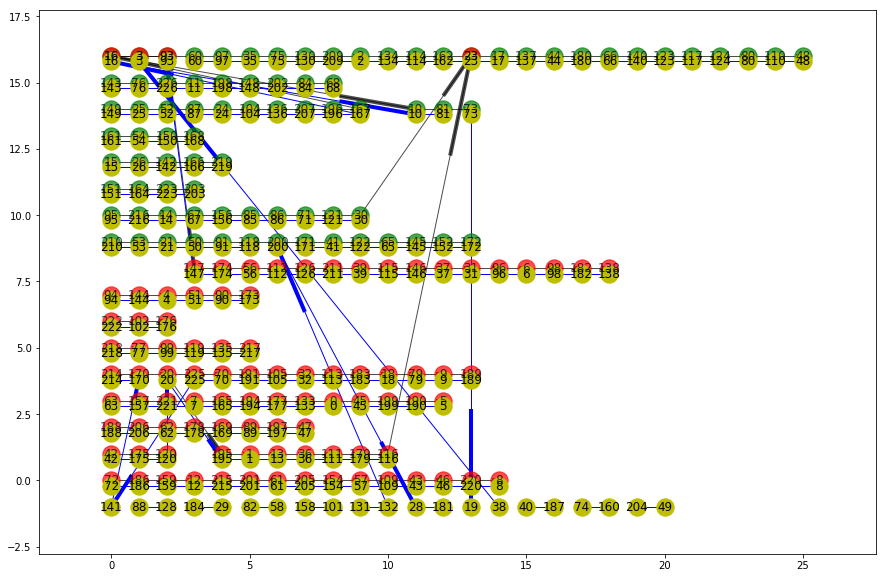

In [307]:
#nx.draw_networkx(G,  alpha = 0.5, pos=pos)
plt.figure(figsize=(15, 10))
nx.draw_networkx(G1, node_color='g', alpha = 0.7, pos=pos)
nx.draw_networkx(G2, node_color='r', alpha = 0.7, pos=pos)

nx.draw_networkx(Gansw, node_color='y', edge_color='b', alpha = 1, pos=shift_pos)

In [289]:
arrays

[[138, 182, 98, 6, 96, 31, 37, 146, 115, 39, 211, 126, 112, 56, 174, 147, 93],
 [72, 186, 159, 12, 215, 201, 61, 205, 154, 57, 109, 43, 46, 220, 8],
 [173, 90, 51, 4, 144, 94],
 [176, 102, 222],
 [42, 175, 120, 20, 195, 1, 13, 36, 111, 179, 116],
 [189, 9, 79, 18, 183, 113, 32, 105, 191, 70, 225, 141, 170, 214],
 [149, 25, 52, 87, 24, 104, 136, 207, 196, 167, 16, 10, 81],
 [217, 135, 119, 99, 77, 218],
 [63, 157, 221, 7, 165, 194, 177, 133, 0, 45, 199, 190, 5],
 [188, 206, 62, 178, 169, 89, 197, 47],
 [48,
  110,
  80,
  124,
  117,
  123,
  140,
  66,
  180,
  44,
  137,
  17,
  23,
  162,
  114,
  134,
  2,
  209,
  130,
  75,
  35,
  97,
  60],
 [15, 26, 142, 166, 219],
 [95, 216, 14, 67, 156, 85, 86, 71, 121, 30],
 [161, 54, 150, 168],
 [171, 41, 122, 65, 145, 152, 172],
 [210, 53, 21, 50, 91, 118],
 [88, 128],
 [151, 164, 223, 203],
 [68, 84, 202, 148, 198, 11, 226, 76, 143],
 [184, 29],
 [82, 58],
 [158, 101],
 [131, 132, 200, 28, 181],
 [73, 19],
 [38, 3],
 [40, 187],
 [74, 160]

In [267]:
ed.eval(strain2[1][3], strain2[4][2])

3

In [268]:
hu.find_closest(answ, strain2[1][3])

(2, 'TGGTGAACAATAAAACAATCATCTAAAGACGAAGAAAA')

In [269]:
hu.find_closest(answ, strain2[4][2])

(3, 'TGGTGAACAATAAAACAATCATCTAAAGACGAAGAAAA')

In [264]:
cl2

[[72, 186, 159, 12, 215, 201, 61, 205, 154, 57, 109, 43, 46, 220, 8],
 [42, 175, 120, 20, 195, 1, 13, 36, 111, 179, 116, 23],
 [188, 206, 62, 178, 169, 89, 197, 47],
 [63, 157, 221, 7, 165, 194, 177, 133, 0, 45, 199, 190, 5],
 [214, 170, 20, 225, 70, 191, 105, 32, 113, 183, 18, 79, 9, 189],
 [218, 77, 99, 119, 135, 217],
 [222, 102, 176],
 [94, 144, 4, 51, 90, 173],
 [16,
  3,
  93,
  147,
  174,
  56,
  112,
  126,
  211,
  39,
  115,
  146,
  37,
  31,
  96,
  6,
  98,
  182,
  138]]